The goal of the project is to perform exploratory data analysis of an ecommerce company based in New York that sells online clothing but also have in-store and clothing advice sessions. Customers come in the store, have meetings with a designer/stylist, and later on go home and order either on the mobile app or at the company website. The company wants us to determine whether they should focus their efforts on the mobile app experience or website.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

As we are working with an external data set, we import the data into Jupyter Notebook. The data consists of customer info such as Email, Address,and their color avatar. The numerical values are such as

1. Average session length
2. Time spent on the mobile app
3. Time spent on the online website
4. Tenure of membership

In [5]:
#Extracting the file into Jupyter Notebook 
customers  = pd.read_csv('Ecommerce Customers')

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analytics 

In [96]:
sns.set_style('whitegrid')
sns.set_palette('BuPu_r')

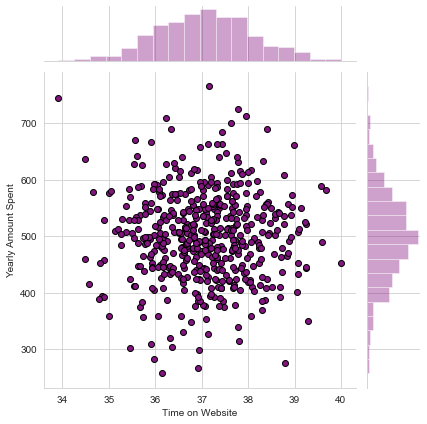

In [100]:
sns.jointplot(x = 'Time on Website',y = 'Yearly Amount Spent', data= customers, edgecolor='black')
#More time spent on Website is directly propertional to more money spent. 

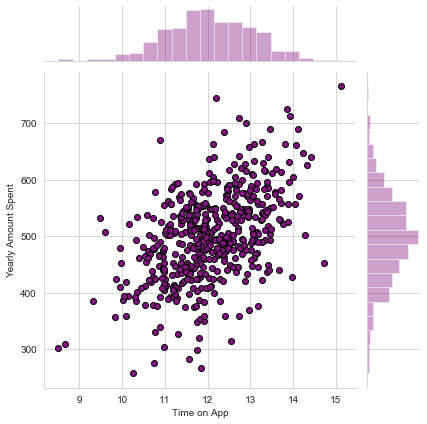

In [99]:
sns.jointplot(x ='Time on App', y = 'Yearly Amount Spent', data = customers,edgecolor= 'black')

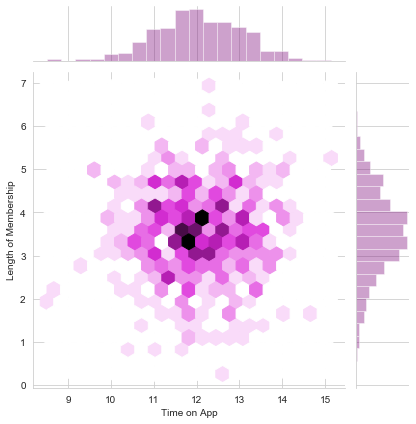

In [101]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = customers, kind = 'hex')

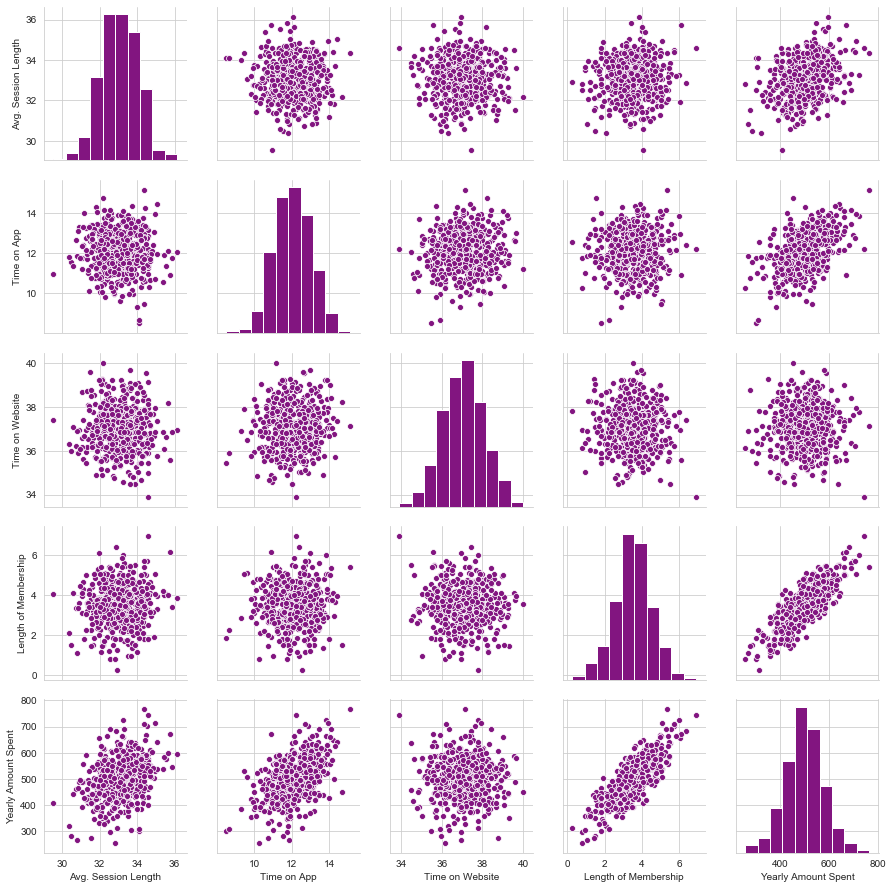

In [103]:
# Explore the types of relationships across the the entire data set using pairplot
sns.pairplot(customers)

In [104]:
# Observing the pair plot, the strongest correlation lies in the length of membership.

# Now Creating a linear model plot of yearly amount spent vs length of Membership

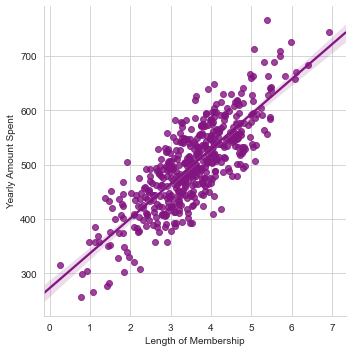

In [126]:
sns.lmplot(y = 'Yearly Amount Spent', x = 'Length of Membership', data= customers)

# Training and testing Data 

In [107]:
# let's split the data into training and testing sets 

In [129]:
# Set X variable to the numerical values of the data sets
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
# Set Y variable to the Yearly Amount Spent Column
Y = customers['Yearly Amount Spent']

In [130]:
#Training our data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [131]:
#Creating an instance of a LinearRegression() model named LM

In [132]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [133]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
#Printing out the coefficients 
print('Coefficients : \n', lm.coef_)

Coefficients : 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [135]:
#Next Step is to predict test data
Predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Linear Regression')

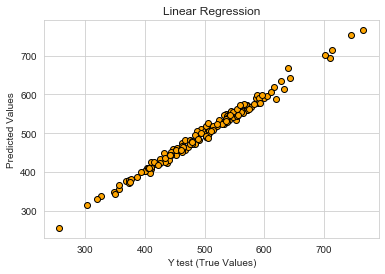

In [136]:
plt.scatter(y_test,Predictions, edgecolors='Black', c= 'Orange')
plt.xlabel('Y test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Linear Regression') 

Notice that our model is performing pretty well. There is a bit of noise but that's minimal.

# Evaluating our model's performance by calculating the residual sum of squares.

So we calculate mean square error, mean average error and Root Mean square error.

In [137]:
from sklearn import metrics
print('MAE=',metrics.mean_absolute_error(y_test,Predictions))
print('MSE=',metrics.mean_squared_error(y_test,Predictions))
print('RMSE=',np.sqrt(MSE))

MAE= 7.228148653430853
MSE= 79.81305165097487
RMSE= 8.933815066978656


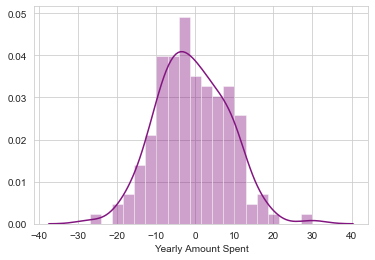

In [138]:
sns.distplot((y_test-Predictions),bins = 20)

In [139]:
metrics.explained_variance_score(y_test,Predictions)
# Thats R^2 which is close to 1, hence proving that our model is accurate.

0.9890771231889606

# Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [143]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns =['Coeffs'])
cdf

,Coeffs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.
Do you think the company should focus more on their mobile app or on their website?

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!